
# <center>**COMP8220 - Machine Learning**</center>
# <center>**Facial Expression Recognition**</center>
# <center>**Major Project**</center>

**Dataset Description:-** Here we have taken dataset from a kaggle competition .It consist of  35887  images with labels of  different emotion  .We have 7 emotion label available in this dataset which is usually denoted by numbers from 0 to 6.This dataset is very famous dataset on kaggle and the link of the dataset can be found here https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data  .It just contain grey scale  images and  the data consist of 48 * 48 pixels.It is also known as FER2013 dataset .It was prepared by Aaron Courville and Pierre-Luc Carrier as part of their project.Emotions label are described as follows :- 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral.The dataset are in csv format and it consist of 3 column emotion ,pixels and usage.Usage consist of training ,testing and validation since we already have testing data so we have taken whole data as training data .

**Mounting Drive**

The dataset has being downloaded along with private and public dataset  and   has been loaded in our Google Drive so we will load from there

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**Importing Libraries**

In [3]:
import keras
import pandas as pd                                                                           #Creating dataframes using list of images
import numpy as np                                                                            #Reading and processing images using Numpy arrays
from os.path import join                                                                      #To combine data files stored at a specific path
import matplotlib.pyplot as plt                                                               #To display plots
from sklearn.neural_network import MLPClassifier                                              #To train and predict using conventional MLPClassifier
from sklearn.metrics import classification_report                                             #For printing the classification report for all the 4 classes
from sklearn.metrics import confusion_matrix                                                  #For displaying the confusion matrix to identify number of correct/incorrect predictions
from sklearn.metrics import accuracy_score                                                    #To calculate how accurate the classification is
from tensorflow.keras import layers, models, optimizers                                       #Importing layers, models and optimizers for building the CNN architecture.
from keras.optimizers import Optimizer                                                        #For using model optimizer while compiling the deep learning model
from keras.models import Sequential                                                           #For Initializing the convulutional neural network
import tensorflow as tf                                                                       #Libarary used for deep learning models
from keras.utils import to_categorical                                                        #For performing one hot encoding and converting categorical variables 
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization                  #Importing all the necessary layers for model architecture
from keras.preprocessing.image import ImageDataGenerator                                      #To be used for data augmentation at a later stage  
from tensorflow.keras.layers import Conv2D,Dense,,MaxPooling2D, Flatten, Dropout              # To be used for Maxpooling and Dropout
import seaborn as sns                                                                         # For displaying count of emotions
                                                                    


**Changing Working Directory to the Dataset**

In [4]:
import os
os.chdir('/content/drive/My Drive/B/')

**Loading Private and Public Test Dataset**

In [ ]:
dataset_directory = '/content/drive/My Drive/B/'
images_test_private = np.load(join(dataset_directory, 'PrivateTest_data_images.npy'))
print("Shape of private dataset is",images_test_private.shape)

Shape of private dataset is (1153, 48, 48)


In [ ]:
images_test_public = np.load(join(dataset_directory, 'PublicTest_data_images.npy'))
print("shape of public dataset is ",images_test_public.shape)

shape of public dataset is  (1136, 48, 48)


We can clearly see that private and public dataset consist of 1153 and 1136 images of 48 *48 pixel

**Loading Dataset**

In [5]:
import pandas as pd
dataset = pd.read_csv('fer2013.csv')

**Displaying first 5 Rows of Dataset**

In [ ]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


   Emotions Description is as follows:- {0: ' Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
  

In [ ]:
dataset.groupby('emotion').count()

,pixels,Usage
emotion,,
0,4953,4953
1,547,547
2,5121,5121
3,8989,8989
4,6077,6077
5,4002,4002
6,6198,6198


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


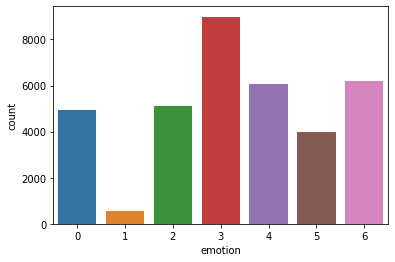

In [56]:

sns.countplot(dataset.emotion)

We can clearly see that  most images we have is for Happpy emotion, follwed by Neutral and Sad emotions.

**Storing pixels and emotion in imagearr and y respectively**

In [6]:
imagearr=dataset.pixels
y=dataset.emotion

In [ ]:
imagearr.shape

(35887,)

**Reshaping Imagearr**

In [7]:
imagearr = dataset.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
imagearr = np.stack(imagearr, axis=0)

Since the number of pixels are 48*48 and our images is grey or black and white so for that we use 1 in reshape as an argument. If there are colored images we can use 3 instead.

**Plotting sample images to show how images of dataset look**

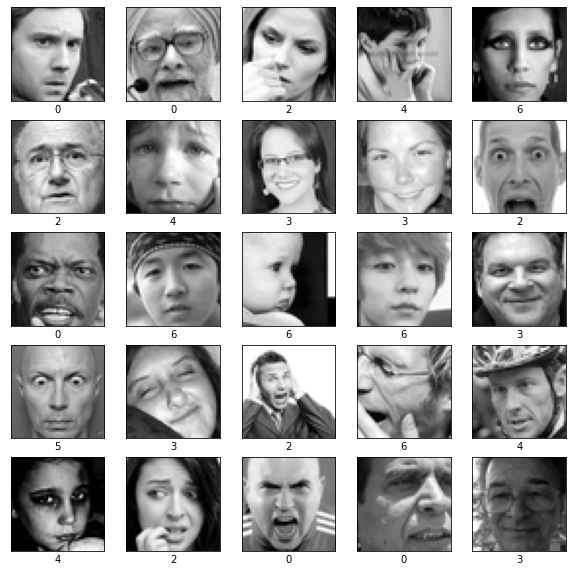

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagearr[i].reshape(48,48), cmap='gray')
    plt.xlabel( y[i]  )
plt.show()

We can clearly see how all the images are grey and just face is captured so that we can extract important features and how each image show differnt emotions.

**How private dataset images looks**

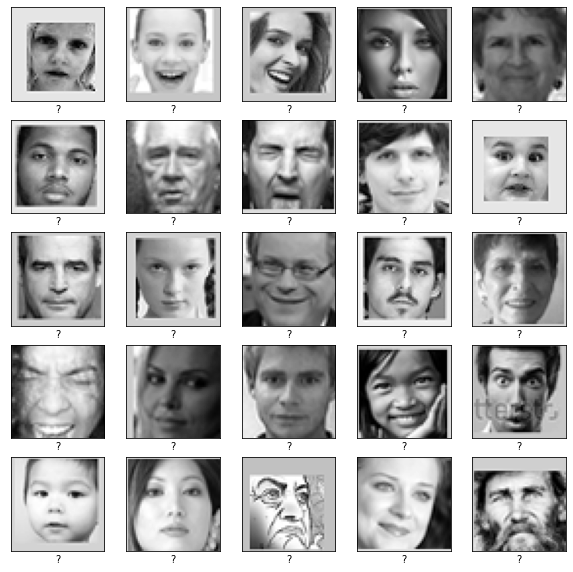

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test_private[i],cmap='gray')
    plt.xlabel( "?"  )
plt.show()

We can clearly see that some of the images of private dataset have animated images and some images have eyes closed and some have grey border which show that images might have cropped or colored around it which is different from our training dataset.



**How Public Test Dataset Looks**

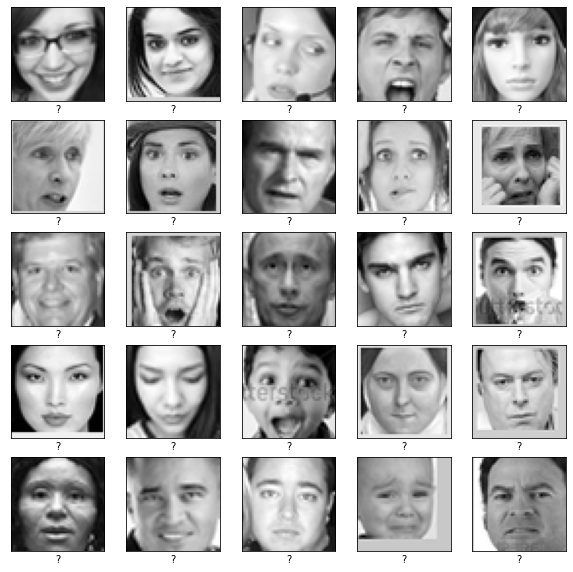

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test_public[i], cmap='gray')
    plt.xlabel("?" )
plt.show()

In Public dataset,again some images have eyes closed and some have grey border or cropped images.

# **Conventional Machine Learning model**

Our first task is to use conventional machine learning algorithm such as support vector machine, decision tree ,random forest etc to find which model best suit this dataset and classify emotions correctly. After running different conventional machine learning we find out that random forest tend to perform best for this dataset .It gives an accuracy of 48.48 % while the decision tree give an accuracy of 46 % .While support vector machine give an accuracy of 47.2 % .So we have choosen random forest classifier as the best model.

**NOTE** :- I was not able to do hyperparameter tuning because of ram issue it was taking around 6 hour everytime

**Reshaping images based on conventional Machine learning**

In [9]:
x = imagearr.reshape(35887, 48*48*1)


As the images pixels was in 4 dimension but in conventional machine learning we dont take data in 4 dimension so we took 2 dimension hence we have multiplied 48x48x1  to reduce dimension from 4d to 2d .

**Checking dimension for confirmation**

In [ ]:
print("shape of images of trainset",x.shape)
print("shape of images of labels",y.shape)

shape of images of trainset (35887, 2304)
shape of images of labels (35887,)


We can clearly see that dimension is now correct for our conventional model

**Splitting Dataset into training and validation set**

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x, y,shuffle=True,test_size=0.1, random_state=42)

**Checking Shape of training and validation splitting **

In [ ]:
print("shape of xtrain dataset is :-",xtrain.shape)
print("shape of xval dataset is :-",xval.shape)
print("shape of ytrain dataset is :-",ytrain.shape)
print("shape of yval dataset is :-",yval.shape)

shape of xtrain dataset is :- (32298, 2304)
shape of xval dataset is :- (3589, 2304)
shape of ytrain dataset is :- (32298,)
shape of yval dataset is :- (3589,)


# **RANDOM FOREST CLASSIFIER**

Random forest classifier select randomly subset of training data that we have provided and create decision trees.The final decision is made based on votes of different decision tress.The more vote we get for particular answer that will be classified as our final answer.

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(xtrain,ytrain)
c=rfc.score(xval,yval)
print(c)

0.4848147116188353


Here we have specified number of estimators =500 as we want to increase our accuracy score as more the number of estimators better will be our model .After fitting random forest classifier we can clearly see that we are getting accuracy of 48.48 % .It is not so bad as we are modelling on 7 classifcation labels.

**Predicted labels on validation data**

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
yprediction = rfc.predict(xval)
print("Validation data labels predicted", yprediction)

Validation data labels predicted [4 3 6 ... 3 3 3]


**Evaluating Performance of our Model**

**(1) Confusion Matrix**

In [17]:
print(confusion_matrix(yval, yprediction))

[[ 98   0  19 186 102  20  73]
 [  2  12   7  17   5   2   7]
 [ 16   0 156 175  88  38  72]
 [  9   0  15 721  71  16  49]
 [ 10   0  27 196 243   9 103]
 [  2   0  18  96  34 236  28]
 [ 11   0  20 194  97  15 274]]


From this matrix we can see that diagonal elements shows the corrected predictions while non -diagonal elements shows incorrected prediction.Summary of corrected predictions are described below:-

* For Label 0, 98 were correctly predicted out of 466.
* For Label 1, 12 were correctly predicted out of 52.
* For Label 2, 156 were correctly predicted out of 545.
* For Label 3, 721 were correctly predicted out of 881.
* For label 4, 243 were correclty predicted out of 392.
* For label 5, 236 were correctly predicted out of 414
* For label 6, 274 were correctly predicted out of 611.



**(2) Classification Report**

In [18]:
print(classification_report(yval, yprediction))

              precision    recall  f1-score   support

           0       0.66      0.20      0.30       498
           1       1.00      0.23      0.38        52
           2       0.60      0.29      0.39       545
           3       0.45      0.82      0.58       881
           4       0.38      0.41      0.40       588
           5       0.70      0.57      0.63       414
           6       0.45      0.45      0.45       611

    accuracy                           0.48      3589
   macro avg       0.61      0.42      0.45      3589
weighted avg       0.53      0.48      0.46      3589



**Interpretation**

1 Precision:- Precission is defined as TP/TP+FP where TP = True positive and FP is false Positive. From the classification report we can clearly see that label 1 has the highest precision followed by label 5 while the lowest precision is for label 4.

2  Recall :-Recall is defined as TP/TP+FN where TP is True positive and FN is false negative .From the classification table we can clearly see that again label 3 has the highest recall  followed by label 5 .while the lowest recall is for label 0 .

3 F1 score:F1 score is calculated by weighted average of precision and recall.F1 value close to 1 is very good while close to 0 is pretty bad.From this classification table we can see that label 5 has highest f1 which is pretty obvious from above results .

# **Deep Learning Model**

Our second task is to use Deep Learning Model to classify images based on their emotions .Deep Learning consist of artificial neural network,convulation neural network,reuccrent neural network.For this dataset we will choose Convolution Neural Network as it tend to perform better or given high accuracy in image classification as compared to others.

**Reshaping data according to Deep Learning**

In [37]:
print("shape of images",imagearr.shape)
print("shape of labels",y.shape)

shape of images (35887, 48, 48, 1)
shape of labels (35887, 7)


As in Deep Learning we need images in 4d format so from the dataset we can clearly see that images are of 4 dimensions where 35887 represent number of images, 48 represent number of pixels and 1 represent black and white color or grey images.

**Performing One Hot encoding on labels**

It is process of splitting  categorical column into 0,1 vector form .But before using one hot encoder it is necessary to convert categorical variable into numerical categorical value  as we have labels form 0 to 6 instead of emotions names.Hence we can apply directly one hot encoder .

In [38]:
y = keras.utils.to_categorical(dataset.emotion, 7)

**Spliting data based on images and labels**

In [39]:
from sklearn.model_selection import train_test_split
XTRAIN, XVAL, YTRAIN, YVAL = train_test_split(imagearr, y,
                                                    shuffle=True,
                                                    test_size=0.1, random_state=44)

**Normalizing data**

In [40]:
XTRAIN = XTRAIN / 255.
XVAL = XVAL / 255.

Normalizing data is compulsory in the neural network as one feature might be big in scale which will dominate .Here we have normalize XTRAIN and XVAL by dividing by 255 as pixel size is from 0 to 255.

**We can check Shape of splitted data**

In [41]:
print(XTRAIN.shape)
print(XVAL.shape)
print(YTRAIN.shape)
print(YVAL.shape)

(32298, 48, 48, 1)
(3589, 48, 48, 1)
(32298, 7)
(3589, 7)


Here we can see that y labels have 2 dimension ,one is the number of label while the second one is 7 which is due to one hot encoder.

**Data Augmentation on Dataset**

We have used data augmentation with default parameters for deep learning model.Main benifit of data augmentation is that it increases the images size without adding new images in the dataset . We are not collecting more images we are just  using different paramters such as zoom_range etc which create different images .This will help our model to predict any images which has used different parameters.


In [42]:
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,
        shear_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=False,
        vertical_flip=False)

**Parameter Explanation** :-

1 **Rotation Range**:- It rotate the images with 10 degree . 



2 **zoom_range**:- It zoom in and out the image .Here we have specified 0.10 so data augmentation can range from 1- value to 1+ value range. It means 0.9 to 1.1  ([90 ,110] percent)


3  **Shear range**:-It randomly apply transformation to our images.


4 **width_shift_range**:- It will shift image horizontaly according to value specified . Here we have specified width_shift_range =0.2 so it means it can shift the image from [-20 , 20] percentage.We can also specify range if we want.


5 **height_shift_range** :-It is similar to width_shift_range there is only one difference it shift the image vertically instead of horizontally.


6 **horizontal_flip**:-Randomly it will flip the image horizontally 


7 **vertical_flip**:-Randomly it will flip the image vertically 

**Defining Convolution Neural Network Model**

In [43]:

model2 = Sequential()
model2.add(Conv2D(32, (5, 5),activation='relu', padding='same',input_shape=(48,48,1)))
model2.add(Conv2D(32, (5, 5), activation='relu', padding='same')) 
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model2.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model2.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
    
model2.add(Dense(units=64,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(units = 7, activation = 'softmax'))

**Explaining convolution layer parameters:-**

**1 Activation Function:**- We have used relu activation function  in our model since it tend to perform better than other activation functions and also introduces non linearity in the images.

**2 CONV2D:**- It is used to create a convolution layer and its main use is to extract important features from images by using filter.For example suppose our image is of size 7x7 matrix  and our filter or kernel is 3x3 ,so we use filter  on images and extract only important information from images .It reduces the size of image and we do loose some information but important features are stored in feature map.

**3 BatchNormalization:-** We have used batch normalization layer after every 2 convolution layer as the main work of batchnormalization  is to normalize input as after every layer distribution of data might change which can make it harder to extract features.

**4 MaxPooling2D:**-In CNN we have different pooling like min,max,mean but for this model we are using max pooling as it tend to be the most commonly used .It is done to remove overfitting.Here we have used pool_size=2,2 it means that we our using 2*2 size feature vector .Hence this layer also reduces the size of image even more and extract most important feature.

**5 Flatten Layer:-** It convert pooled feature map into one column array which can be input in artifical neural network.It also serve as a connection between maxpooling and dense layer.

**6 Dense Layer:-** It serve as output layer for our model.Since we have 7 emotion label so we have classified units=7 and we have used softmax activation function because it is used for multiclass classifier problems.

**7 Dropout:-** It is also used for removing overfitting problem.Sometime co-adaption problem occur in such a scenario it is important to use dropout layer.

**Compiling Model**

In [44]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


Here we have used optimizer adam as it is  most commonly used optimizer and  used for  control learning rate .As we have categorical data as response variable hence we have used loss=categorical_crossentropy

**Summary of Model**

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        102464    
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 64)       

From the summary we can see  all the layers that we have used in our model , the number of parameters ,trainable and non trainable parameters.

**Training of Model**

In [46]:
history2 = model2.fit(datagen.flow(XTRAIN, YTRAIN, batch_size=64), epochs=25, validation_data=(XVAL, YVAL), verbose=1)

Epoch 1/25
505/505 [==============================] - 15s 30ms/step - loss: 2.0112 - accuracy: 0.2216 - val_loss: 1.7930 - val_accuracy: 0.2770
Epoch 2/25
505/505 [==============================] - 15s 29ms/step - loss: 1.7833 - accuracy: 0.2836 - val_loss: 1.6857 - val_accuracy: 0.3330
Epoch 3/25
505/505 [==============================] - 15s 29ms/step - loss: 1.5773 - accuracy: 0.3877 - val_loss: 1.5554 - val_accuracy: 0.3926
Epoch 4/25
505/505 [==============================] - 15s 29ms/step - loss: 1.4171 - accuracy: 0.4582 - val_loss: 1.2728 - val_accuracy: 0.5038
Epoch 5/25
505/505 [==============================] - 14s 28ms/step - loss: 1.3102 - accuracy: 0.5017 - val_loss: 1.2257 - val_accuracy: 0.5305
Epoch 6/25
505/505 [==============================] - 14s 29ms/step - loss: 1.2496 - accuracy: 0.5279 - val_loss: 1.1954 - val_accuracy: 0.5403
Epoch 7/25
505/505 [==============================] - 14s 28ms/step - loss: 1.2045 - accuracy: 0.5429 - val_loss: 1.1878 - val_accuracy:

We have taken 25 epochs only because after that it started overfitting

**Validation Loss and Validation Accuracy Graph**

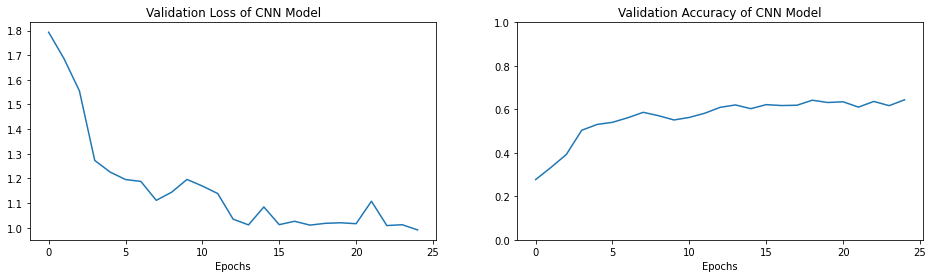

In [48]:
fig = plt.figure(figsize=(16,4))
P1 = fig.add_subplot(121)
P1.plot(history2.history["val_loss"])
P1.set_title("Validation Loss of CNN Model")
P1.set_xlabel("Epochs")


P2 = fig.add_subplot(122)
P2.plot(history2.history["val_accuracy"])
P2.set_title("Validation Accuracy of CNN Model")
P2.set_xlabel("Epochs")
P2.set_ylim(0, 1)

plt.show()

**Interpretation**:- We can clearly see from validation loss that it tends to decrease  from 0 to 25 epochs but it increases thrice in between. while validation accuracy tends to increase most in between 0 to 5 epochs after that it increases very slightly.We can also see that validation loss has 0.99 value while accuracy is 64.39 which is pretty good.

**Loss Plot**

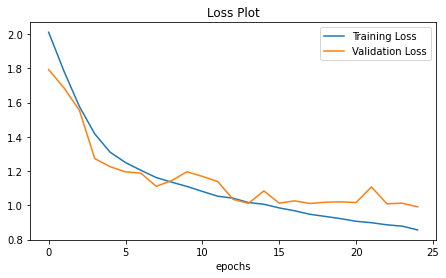

In [47]:
fig = plt.figure(figsize=(16,4))
P3 = fig.add_subplot(121)
P3.plot(history2.history["loss"], label = 'Training Loss')
P3.plot(history2.history["val_loss"], label = 'Validation Loss')
P3.set_title("Loss Plot")
P3.set_xlabel("epochs")
P3.legend()

plt.show()

Interpretation :-From this graph we can see that validation loss tend to have higher validation loss as compared to training loss.Since the gap between 2 lines are pretty small it shows there might be very small overfitting.

In [49]:
validationloss, validationAccuracy = model2.evaluate(XVAL, YVAL)
print("Validation accuracy of the model:", validationAccuracy)
print("Validation loss of the model:", validationloss)

113/113 [==============================] - 1s 5ms/step - loss: 0.9910 - accuracy: 0.6439
Validation accuracy of the model: 0.6439119577407837
Validation loss of the model: 0.9910133481025696


In [50]:
ypredicted= model2.predict(XVAL)
converted_ypredicted = np.argmax(ypredicted, axis=1)
converted_ypredicted[0:10]

array([3, 6, 0, 3, 3, 5, 3, 4, 0, 5])

In [51]:
 ycorrected= np.argmax(YVAL,axis = 1) 

**CONFUSION MATRIX**

In [52]:

from sklearn.metrics import classification_report, confusion_matrix
cmatrix = confusion_matrix(ycorrected, converted_ypredicted) 

In [53]:
print(cmatrix)


[[174   7  71  24 121  11  58]
 [  6  27  10   4  10   0   2]
 [ 19   2 266  30 118  36  42]
 [ 13   0  25 791  27  18  39]
 [ 22   5  98  27 360   8 103]
 [  5   0  50  26   6 322  17]
 [  6   0  28  54 120  10 371]]



From this matrix we can see that diagonal elements shows the corrected predictions while non -diagonal elements shows incorrected prediction.Summary of corrected predictions are described below:-

* For Label 0, 174 were correctly predicted out of 466.
* For Label 1, 27 were correctly predicted out of 59.
* For Label 2, 266 were correctly predicted out of 513.
* For Label 3, 791 were correctly predicted out of 913.
* For label 4, 360 were correclty predicted out of 623.
* For label 5, 322 were correctly predicted out of 426
* For label 6, 371 were correctly predicted out of 589.

In [54]:
print("Classification report from our deep learning model:\n", classification_report(ycorrected, converted_ypredicted, zero_division=True))

Classification report from our deep learning model:
               precision    recall  f1-score   support

           0       0.71      0.37      0.49       466
           1       0.66      0.46      0.54        59
           2       0.49      0.52      0.50       513
           3       0.83      0.87      0.85       913
           4       0.47      0.58      0.52       623
           5       0.80      0.76      0.77       426
           6       0.59      0.63      0.61       589

    accuracy                           0.64      3589
   macro avg       0.65      0.60      0.61      3589
weighted avg       0.66      0.64      0.64      3589



**Interpretation**

1 Precision:- Precission is defined as TP/TP+FP where TP = True positive and FP is false Positive. From the classification rate we can clearly see that label 3 has the highest precision followed by label 5 while the lowest precision is for label 0.

2  Recall :-Recall is defined as TP/TP+FN where TP is True positive and FN is false negative .From the classification table we can clearly see that again label 3 has the highest recall  followed by label 5 .while the lowest recall is for label 1 and label2.

3 F1 score:F1 score is calculated by weighted average of precision and recall.F1 value close to 1 is very good while close to 0 is pretty bad.From this classification table we can see that label 3 has highest f1 which is pretty obvious from above results .

**Comparing Accuracy of Convential Model and Deep Learning Model**

In [55]:
data = {"Models" : ["Conventional model", "Deep Learning model"], "Accuracy": [c, validationAccuracy]}
df = pd.DataFrame(data=data)
df

,Models,Accuracy
0,Conventional model,0.484815
1,Deep Learning model,0.643912


**Discussion of Deep Learning**.Here I have tried 2 different model one which is shown above and the other one is model with same convolution layers but different filters. Instead of 32,32,64,64,128,128, i have taken 64,64,128,128,256,256 and the accuracy was pretty close to our model hence we have considered the less complex model and that model tend to overfit a little bit too.

**Reshaping test data for deep learning model**

In [ ]:

images_test_public = images_test_public.reshape(1136,48,48,1)

In [ ]:
images_test_private=images_test_private.reshape(1153,48,48,1)

**Checking shape of test data to confirm**

In [ ]:
print("shape of public test_data",images_test_public.shape)
print("shape of private test data",images_test_private.shape)

shape of public test_data (1136, 48, 48, 1)
shape of private test data (1153, 48, 48, 1)


**Converting predicted labels into array format for both public and private test prediction**

In [ ]:
public_data_pred = model2.predict(images_test_public)
public_data_pred = np.argmax(public_data_pred, axis=1)
public_data_pred[0:80]

array([3, 3, 2, 0, 6, 4, 5, 0, 2, 2, 3, 5, 4, 0, 5, 6, 4, 3, 6, 0, 6, 3,
       4, 4, 0, 4, 3, 5, 3, 6, 0, 0, 3, 6, 0, 0, 3, 0, 3, 3, 0, 3, 6, 6,
       0, 3, 6, 6, 6, 6, 6, 3, 3, 2, 4, 0, 3, 5, 0, 0, 3, 6, 6, 4, 3, 4,
       0, 4, 3, 3, 3, 3, 3, 2, 6, 3, 3, 2, 3, 6])

In [ ]:
private_data_pred = model2.predict(images_test_private)
private_data_pred = np.argmax(private_data_pred, axis=1)
private_data_pred[0:80]

array([6, 5, 3, 6, 3, 6, 4, 0, 6, 5, 0, 6, 3, 6, 3, 0, 6, 6, 3, 2, 6, 6,
       0, 3, 6, 3, 0, 2, 3, 6, 6, 4, 2, 3, 0, 3, 3, 0, 5, 4, 3, 3, 3, 6,
       6, 6, 6, 0, 5, 0, 6, 2, 3, 6, 5, 0, 6, 6, 5, 2, 6, 6, 4, 0, 6, 3,
       5, 1, 5, 3, 0, 0, 6, 0, 3, 3, 6, 2, 3, 6])

**Creating CSV file for PUBLIC AND PRIVATE DATASET**

In [ ]:
import pandas as pd

files_test_public=pd.read_csv('predictions_label0.csv')
df = pd.DataFrame({"ID":files_test_public['ID'], "Predictions": public_data_pred})
predictions1 = df.to_csv('/content/drive/My Drive/lastplz.csv', index = False)

In [ ]:
files_test_private=pd.read_csv('private_predictions_label0.csv')
df = pd.DataFrame({"ID":files_test_private['ID'], "Predictions": private_data_pred})
predictions2 = df.to_csv('/content/drive/My Drive/privateresult2.csv', index = False)

Prediction of both Public test and private test has been uploaded and we get an accuracy of 71.390 for public test and 74.58 for private test .

**Discussion**:- In this major project after using conventional and deep learning model we can clearly see that our deep learning model tend to perform much better than conventional model by accuracy of 16 % extra which is pretty good .While our deep learning model gives accuracy of 71.390 percent in  public test and 74.58 in private test which is pretty good despite that we have 7 classifications .The reason behind higher accuracy of private test is that it contains animated images which maybe present in our training set and our model have predicted  those images correctly which may have increases the accuracy slightly .However validation set is giving an accuracy of 64%  which is comparitively low as compared to test set.One possible reason of low accuracy could be that our public test contains cropped or grey border images which is not present in  our training dataset. So our model might have predicted those images wrongly.Another possible reason of difference in accuracy could be that our original dataset contains 9000 images while our new dataset consist of 35000 images which have increased the accuracy of convulation neural network .


Briefly we can conclude that more the images better will be our deep learning model .

**Ranking in Kaggle**

In the  kaggle competiton, deeplearning model in public dataset got 1st rank , while  in private dataset it became 2nd in ranking.